# Inference

import library

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time
import os
import copy

global variable

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 4
WORKERS = 4
DATA_DIR = 'ojol-dataset'

## Prepare Dataset

image transform

In [3]:
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Create dataset

In [4]:
data_dir = 'ojol-dataset/'

image_datasets = datasets.ImageFolder(os.path.join(DATA_DIR, 'test'), data_transforms)
dataloaders = DataLoader(image_datasets, batch_size=BATCH_SIZE, shuffle=False, num_workers=WORKERS)
              
dataset_sizes = len(image_datasets)
class_names = image_datasets.classes

Show image tensor

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(1)  # pause a bit so that plots are updated

## Testing

In [9]:
MODEL_PATH = "model/ride-hailing_model_mfm_demo.pth"
model = torch.load(MODEL_PATH)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

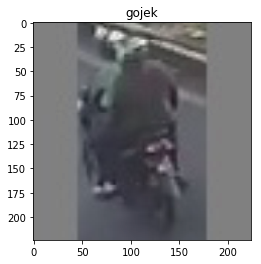

PREDICTION:  gojek


In [10]:
img, label = image_datasets[10]
imshow(img, class_names[label])

img = img[None]
img = img.to(device)

logit = model(img)
_, preds = torch.max(logit, 1)

preds = preds.cpu().data[0]
preds = int(preds)
preds = class_names[preds]

print("PREDICTION: ", preds)

## Evaluate Testing dataset

Accuracy

In [11]:
acc = 0
for inputs, labels in dataloaders:
    
    with torch.no_grad():
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        acc += torch.sum(preds.cpu() == labels.data)

acc = acc.double().data.numpy() / dataset_sizes
print("Accuracy: ", acc)

Accuracy:  0.8
